In [219]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

In [220]:
olivetti_faces = fetch_olivetti_faces()

In [221]:
olivetti_faces.data.shape

(400, 4096)

In [222]:
olivetti_faces.target.shape

(400,)

In [223]:
olivetti_faces.images.shape

(400, 64, 64)

In [224]:
X = olivetti_faces.data

In [225]:
y = olivetti_faces.target

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

In [227]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [228]:
kmeans = KMeans(n_clusters=40)

In [229]:
kmeans.fit(X_train)

KMeans(n_clusters=40)

In [230]:
kmeans.inertia_

9376.9248046875

In [231]:
silhouette_score(X_train, kmeans.predict(X_train))

np.float32(0.1411231)

In [232]:
kmeans.cluster_centers_

array([[0.40495867, 0.44923258, 0.49468714, ..., 0.19893742, 0.21605667,
        0.2142857 ],
       [0.2392103 , 0.22497706, 0.20936638, ..., 0.38613406, 0.3553719 ,
        0.33562902],
       [0.44524795, 0.52737606, 0.6420455 , ..., 0.12138429, 0.1430785 ,
        0.16580579],
       ...,
       [0.36033058, 0.38099173, 0.3966942 , ..., 0.6867769 , 0.7289256 ,
        0.7049587 ],
       [0.4661157 , 0.49008265, 0.56198347, ..., 0.16859503, 0.18842974,
        0.19421488],
       [0.45971075, 0.54545456, 0.5444215 , ..., 0.12706612, 0.08161157,
        0.08780992]], dtype=float32)

In [233]:
kmeans.labels_

array([ 9, 36,  0, 16, 23, 18, 19,  9, 33, 24,  1, 11, 37, 24,  2, 17,  5,
       38, 18, 13,  8, 31, 28, 28, 29, 16, 18, 21, 20, 25, 19, 18, 16, 12,
       33,  5, 15, 10, 10,  7,  8, 36, 31, 24,  5, 29,  8, 23, 36, 32, 21,
       24,  8, 12, 37, 15, 36, 28, 37, 32, 29, 39,  3, 15, 17,  8,  1, 12,
       24, 10, 13, 13, 24, 13,  1, 13, 31, 21, 32, 14,  4, 24,  1, 13, 21,
       17, 29, 12, 10, 15, 35,  9, 10, 12, 39,  8, 24, 22, 27, 12, 22, 22,
       30,  6, 38,  5,  8,  8,  8,  8, 19,  5, 19, 34, 24,  9,  3, 27, 12,
       24,  5, 23, 12,  3,  4,  3, 13, 13, 17, 35,  9, 32,  4, 15, 24,  2,
       17, 24,  1,  0,  3, 20, 35, 12,  3,  5, 18,  0, 21, 27, 29,  5, 31,
       13,  8, 11,  5, 13, 13, 18, 30, 17, 12,  8,  1, 14,  2, 22, 32, 16,
        3, 22, 33,  2, 25,  8,  4, 39, 31,  1, 38, 21,  4,  8, 27, 38, 37,
       30,  8, 13,  7, 30,  2,  6, 20, 11, 29,  7, 36, 14, 25, 32, 37,  0,
       39,  1, 14, 21, 11,  8,  4, 26, 30, 19, 30,  4,  9, 36, 29, 38, 11,
       27, 27, 12,  4, 32

Cluster 0:


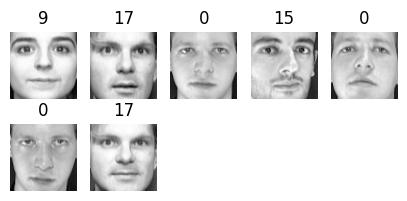

Cluster 1:


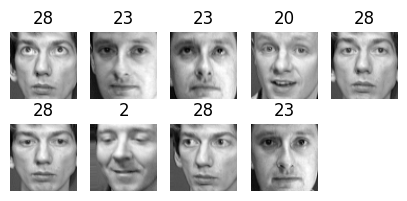

Cluster 2:


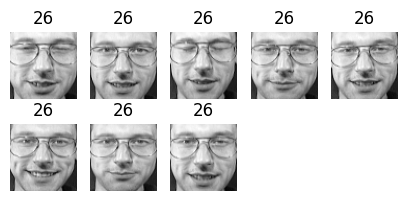

Cluster 3:


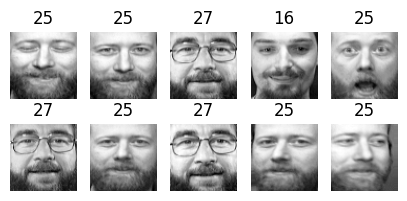

Cluster 4:


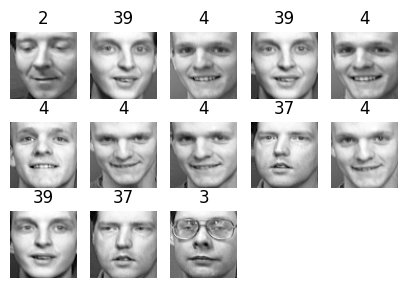

Cluster 5:


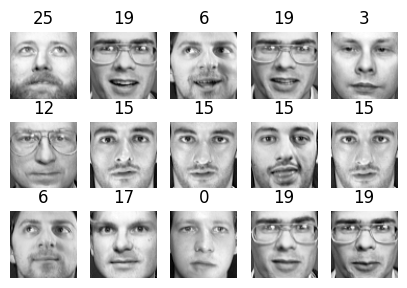

Cluster 6:


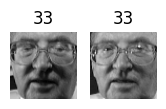

Cluster 7:


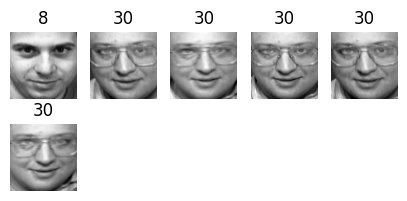

Cluster 8:


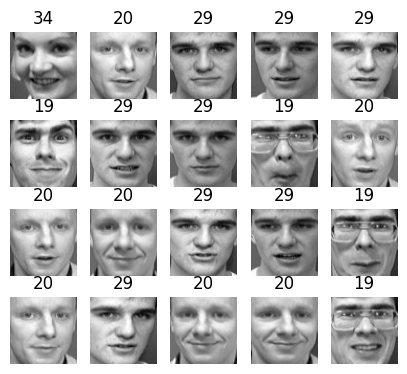

Cluster 9:


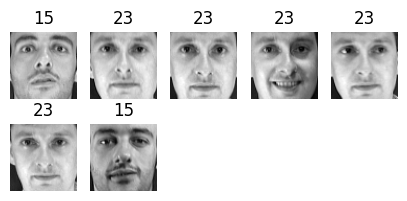

Cluster 10:


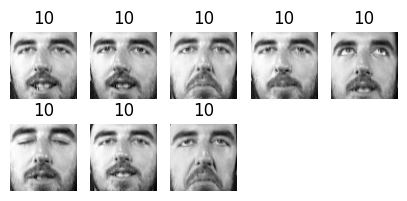

Cluster 11:


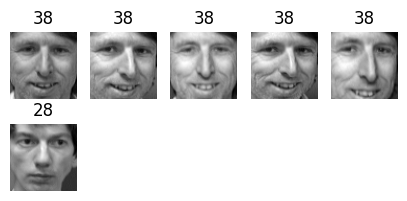

Cluster 12:


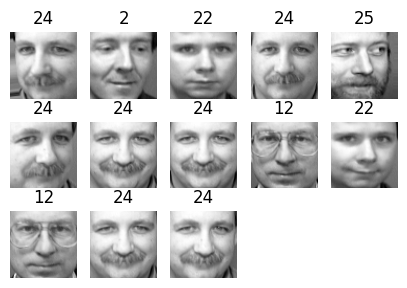

Cluster 13:


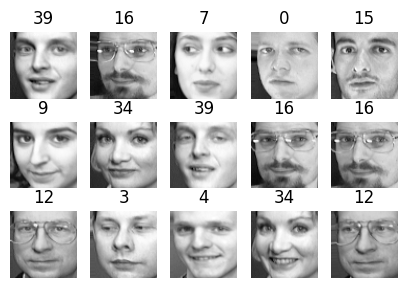

Cluster 14:


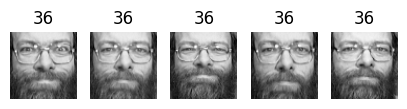

Cluster 15:


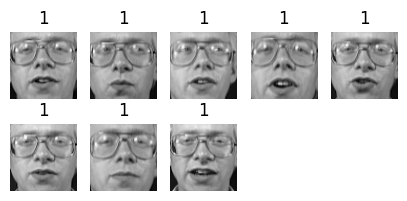

Cluster 16:


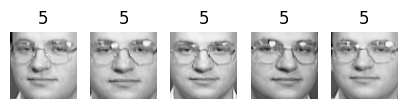

Cluster 17:


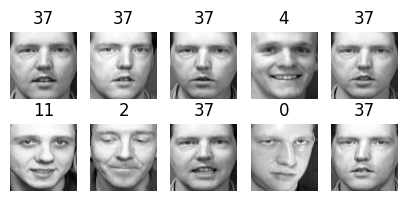

Cluster 18:


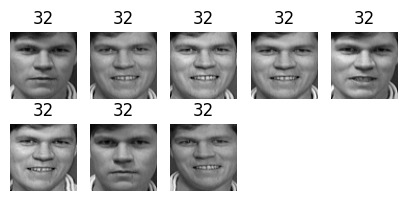

Cluster 19:


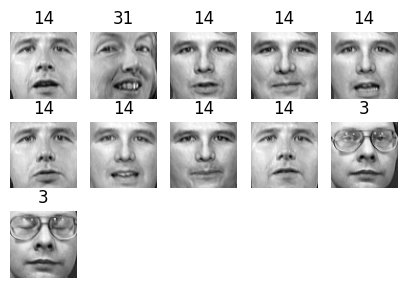

Cluster 20:


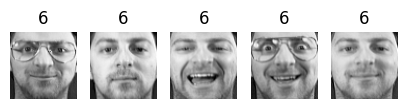

Cluster 21:


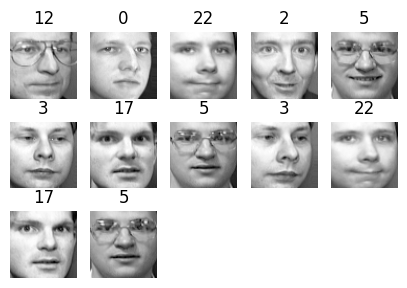

Cluster 22:


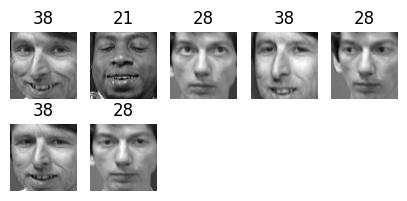

Cluster 23:


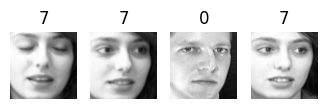

Cluster 24:


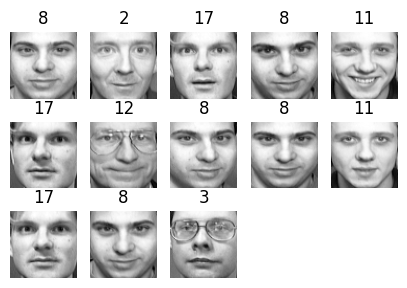

Cluster 25:


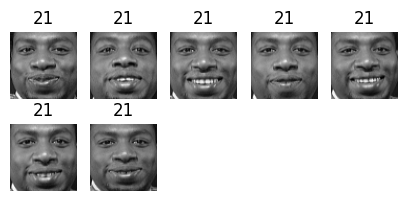

Cluster 26:


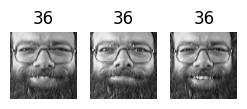

Cluster 27:


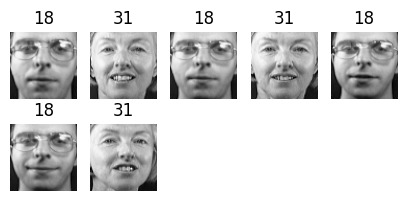

Cluster 28:


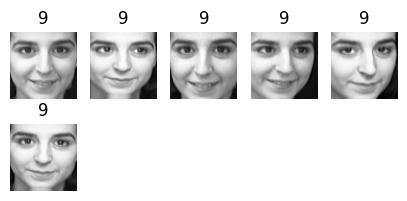

Cluster 29:


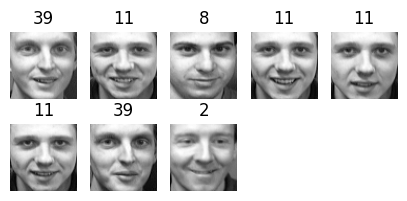

Cluster 30:


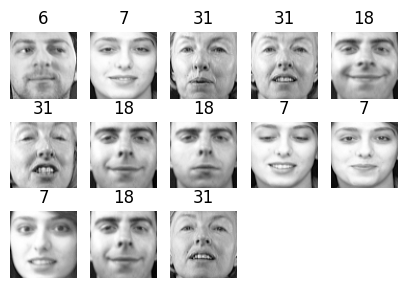

Cluster 31:


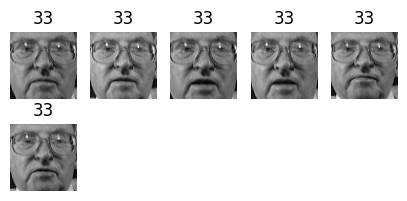

Cluster 32:


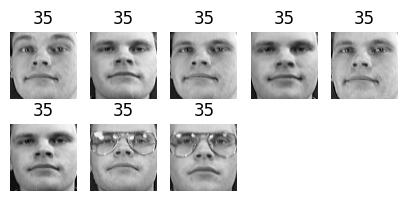

Cluster 33:


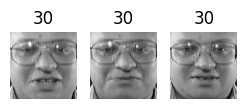

Cluster 34:


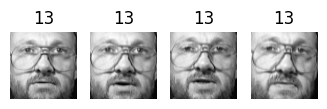

Cluster 35:


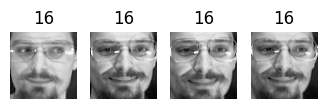

Cluster 36:


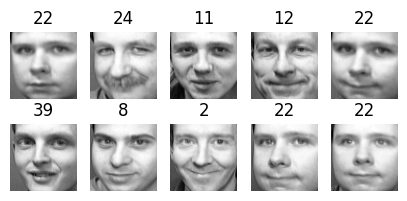

Cluster 37:


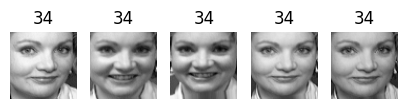

Cluster 38:


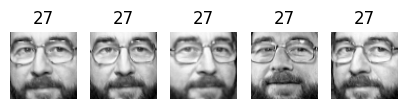

Cluster 39:


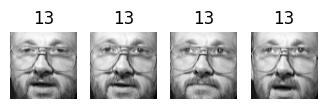

In [234]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)  # Garantir que as faces têm o formato 64x64
    n_rows = (len(faces) - 1) // n_cols + 1  # Calcular o número de linhas
    plt.figure(figsize=(n_cols, n_rows * 1.1))  # Ajustar o tamanho da figura
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")  # Exibir a imagem em escala de cinza
        plt.axis("off")  # Remover os eixos
        plt.title(label)  # Título com o label
    plt.show()

# Exibir as faces para cada cluster do modelo KMeans
for cluster_id in np.unique(kmeans.labels_):  # Usar kmeans.labels_ diretamente
    print(f"Cluster {cluster_id}:")
    in_cluster = kmeans.labels_ == cluster_id  # Identificar as imagens no cluster
    faces = X_train[in_cluster]  # Filtrar as faces do cluster
    labels = y_train[in_cluster]  # Filtrar os labels correspondentes
    plot_faces(faces, labels)  # Plotar as faces e seus labels

In [235]:
import matplotlib.pyplot as plt

In [236]:
from sklearn.decomposition import PCA

In [237]:
pca = PCA(n_components=0.99)

In [238]:
X_train_pca = pca.fit_transform(X_train)

In [239]:
X_test_pca = pca.transform(X_test)

In [240]:
k_range = range(5, 150, 5)

In [241]:
kmeans_per_k = []

In [242]:
for k in k_range:
    kmeans = KMeans(n_clusters=k).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

In [243]:
silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]

In [244]:
best_index = np.argmax(silhouette_scores)

In [245]:
best_index

np.int64(22)

In [246]:
best_k = k_range[best_index]

In [247]:
best_k

115

In [248]:
silhouette_scores[21]

np.float32(0.1943487)

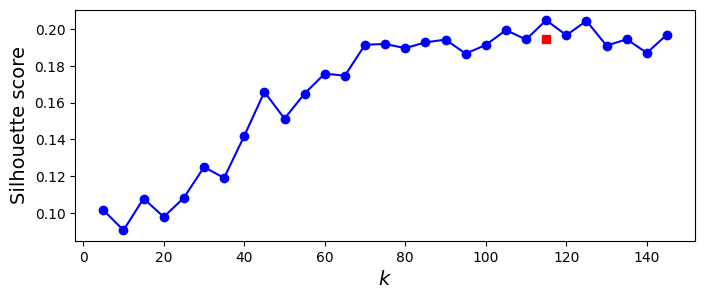

In [249]:
plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, silhouette_scores[21], "rs")
plt.show()

In [250]:
best_model = kmeans_per_k[best_index]

Cluster 0


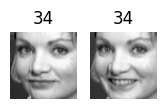

Cluster 1


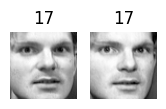

Cluster 2


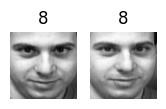

Cluster 3


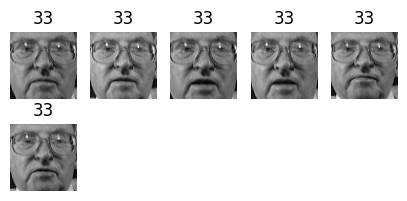

Cluster 4


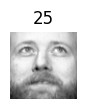

Cluster 5


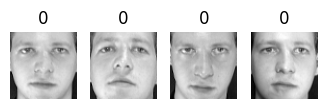

Cluster 6


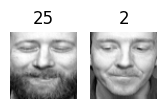

Cluster 7


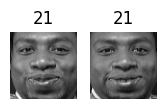

Cluster 8


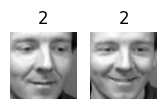

Cluster 9


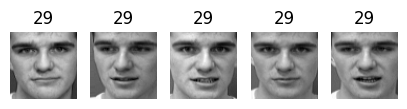

Cluster 10


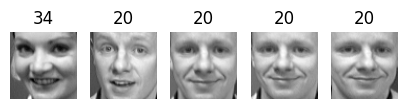

Cluster 11


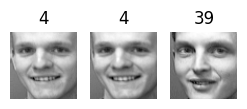

Cluster 12


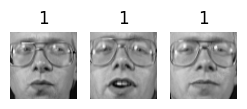

Cluster 13


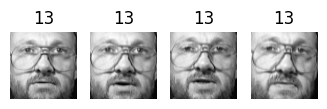

Cluster 14


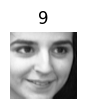

Cluster 15


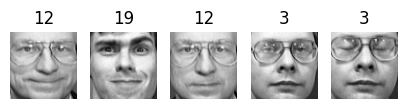

Cluster 16


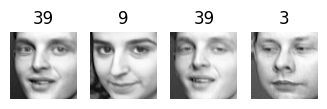

Cluster 17


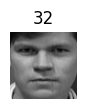

Cluster 18


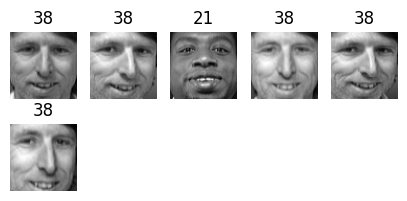

Cluster 19


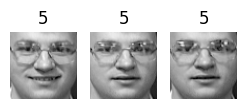

Cluster 20


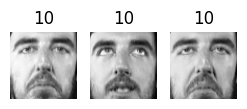

Cluster 21


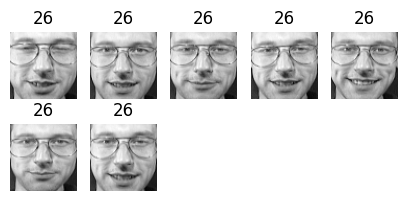

Cluster 22


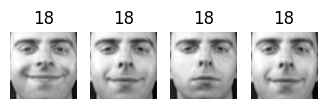

Cluster 23


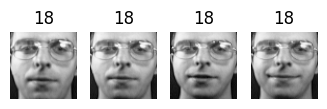

Cluster 24


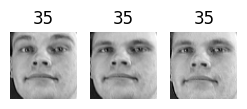

Cluster 25


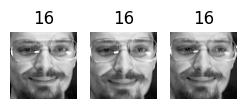

Cluster 26


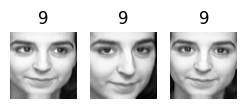

Cluster 27


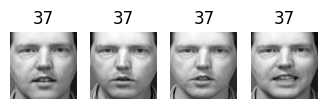

Cluster 28


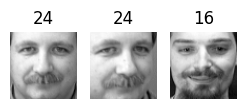

Cluster 29


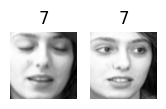

Cluster 30


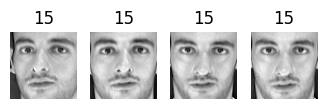

Cluster 31


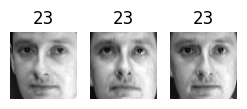

Cluster 32


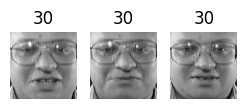

Cluster 33


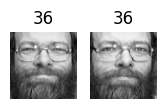

Cluster 34


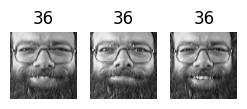

Cluster 35


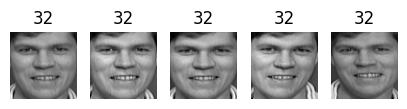

Cluster 36


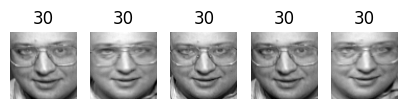

Cluster 37


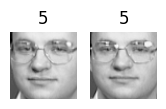

Cluster 38


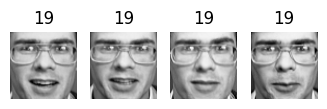

Cluster 39


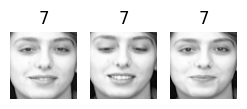

Cluster 40


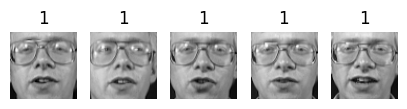

Cluster 41


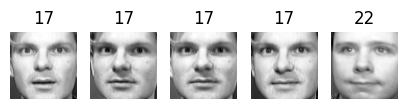

Cluster 42


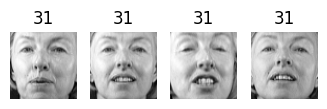

Cluster 43


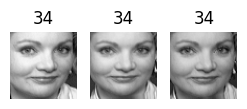

Cluster 44


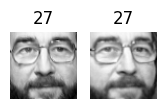

Cluster 45


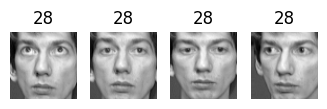

Cluster 46


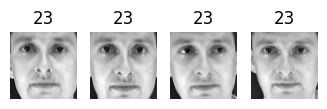

Cluster 47


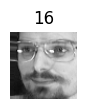

Cluster 48


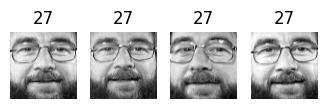

Cluster 49


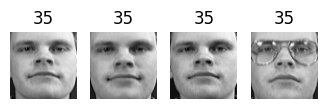

Cluster 50


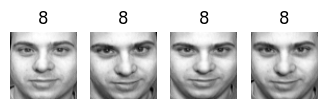

Cluster 51


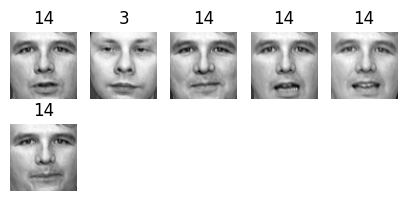

Cluster 52


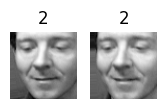

Cluster 53


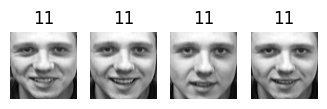

Cluster 54


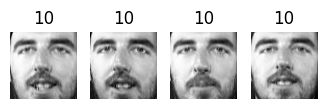

Cluster 55


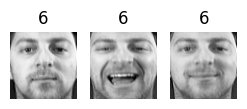

Cluster 56


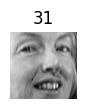

Cluster 57


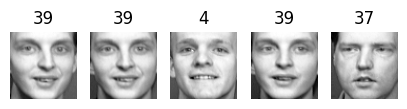

Cluster 58


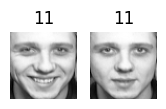

Cluster 59


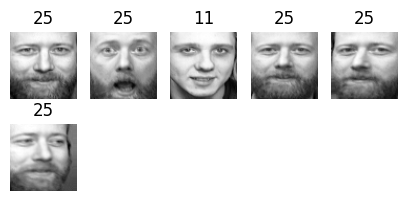

Cluster 60


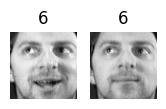

Cluster 61


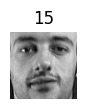

Cluster 62


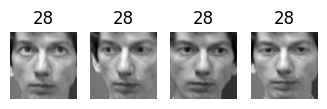

Cluster 63


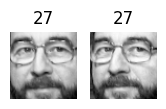

Cluster 64


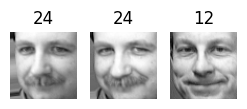

Cluster 65


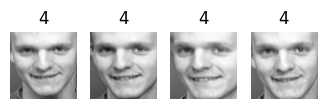

Cluster 66


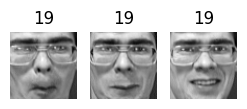

Cluster 67


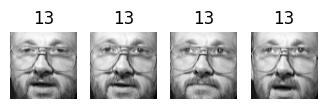

Cluster 68


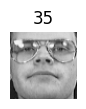

Cluster 69


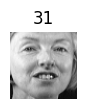

Cluster 70


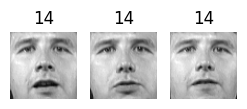

Cluster 71


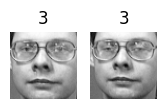

Cluster 72


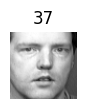

Cluster 73


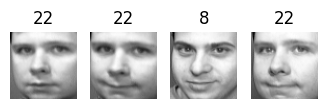

Cluster 74


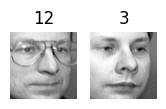

Cluster 75


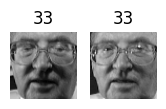

Cluster 76


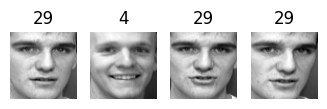

Cluster 77


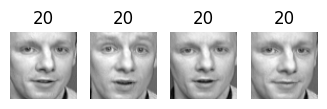

Cluster 78


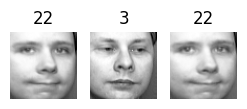

Cluster 79


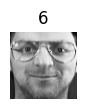

Cluster 80


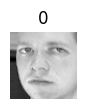

Cluster 81


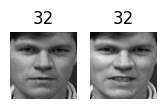

Cluster 82


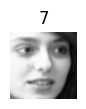

Cluster 83


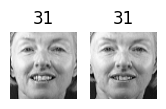

Cluster 84


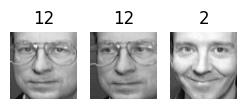

Cluster 85


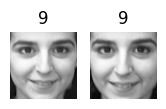

Cluster 86


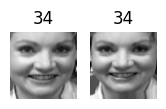

Cluster 87


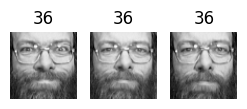

Cluster 88


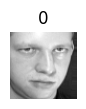

Cluster 89


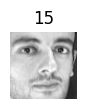

Cluster 90


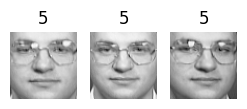

Cluster 91


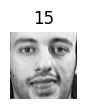

Cluster 92


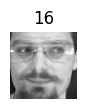

Cluster 93


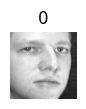

Cluster 94


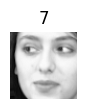

Cluster 95


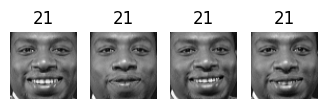

Cluster 96


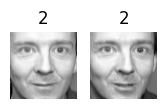

Cluster 97


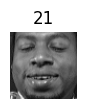

Cluster 98


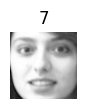

Cluster 99


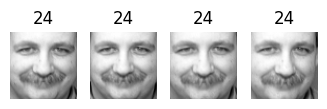

Cluster 100


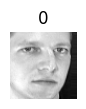

Cluster 101


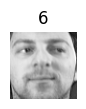

Cluster 102


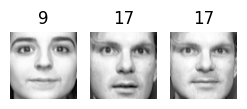

Cluster 103


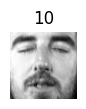

Cluster 104


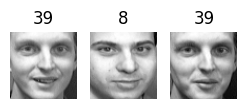

Cluster 105


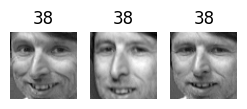

Cluster 106


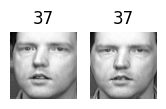

Cluster 107


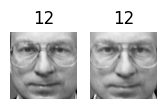

Cluster 108


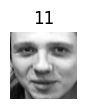

Cluster 109


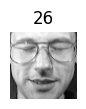

Cluster 110


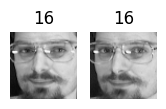

Cluster 111


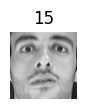

Cluster 112


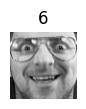

Cluster 113


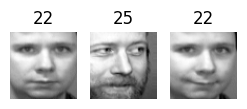

Cluster 114


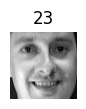

In [251]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

In [252]:
from sklearn.ensemble import RandomForestClassifier

In [253]:
rdf = RandomForestClassifier(n_estimators=150)

In [254]:
rdf.fit(X_train_pca, y_train)

RandomForestClassifier(n_estimators=150)

In [255]:
y_pred = rdf.predict(X_test_pca)

# Calculando a acurácia
accuracy = rdf.score(X_test_pca, y_test)

print(f"Acurácia: {accuracy}")

Acurácia: 0.95


In [256]:
variance2 = pca.explained_variance_ratio_

In [257]:
np.sum(pca.explained_variance_)

np.float32(77.25257)

In [258]:
from sklearn.mixture import GaussianMixture

In [259]:
gm = GaussianMixture(n_components=40)

In [260]:
gm.fit(X_train_pca)

GaussianMixture(n_components=40)

In [261]:
pred = gm.predict(X_test_pca)

In [262]:
X_new, y_new = gm.sample(n_samples=20)

In [263]:
faces = pca.inverse_transform(X_new)

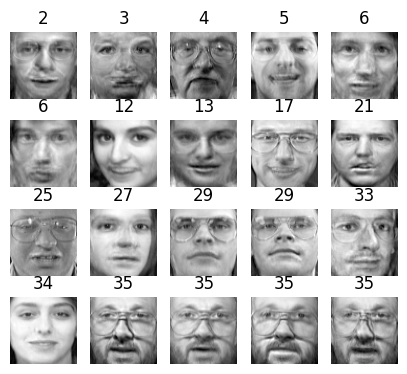

In [264]:
plot_faces(faces, y_new)

In [268]:
X_train_pca

array([[ 3.5840471e+00, -5.8517689e-01, -3.7269549e+00, ...,
         9.4868056e-02,  2.3315521e-02, -1.3137211e-01],
       [ 2.1933634e+00, -1.7227992e+00,  1.0212823e+00, ...,
         7.1731180e-02,  1.1222605e-02, -5.4550856e-02],
       [ 6.8830690e+00,  1.6899904e+00, -8.2755369e-01, ...,
        -8.1698790e-02, -2.0982391e-01,  3.3047280e-01],
       ...,
       [ 5.0903726e+00,  2.1585431e+00, -6.2507755e-01, ...,
         4.7489638e-03,  6.4854063e-02,  2.3957098e-01],
       [ 9.9486170e+00, -3.0700538e+00, -7.8939879e-01, ...,
         1.2102506e-01, -8.5130498e-02, -6.3194714e-02],
       [ 5.0797825e+00, -3.6085613e+00,  1.1891541e+00, ...,
        -5.8096619e-03, -5.4432727e-02, -1.4692979e-01]], dtype=float32)

In [278]:
def reconstruction_erros(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [280]:
r1 = reconstruction_erros(pca, X_train).mean()
r1

np.float32(0.00018723459)

In [283]:
r2 = reconstruction_erros(pca, faces).mean()
r2

np.float64(8.555302249857007e-14)